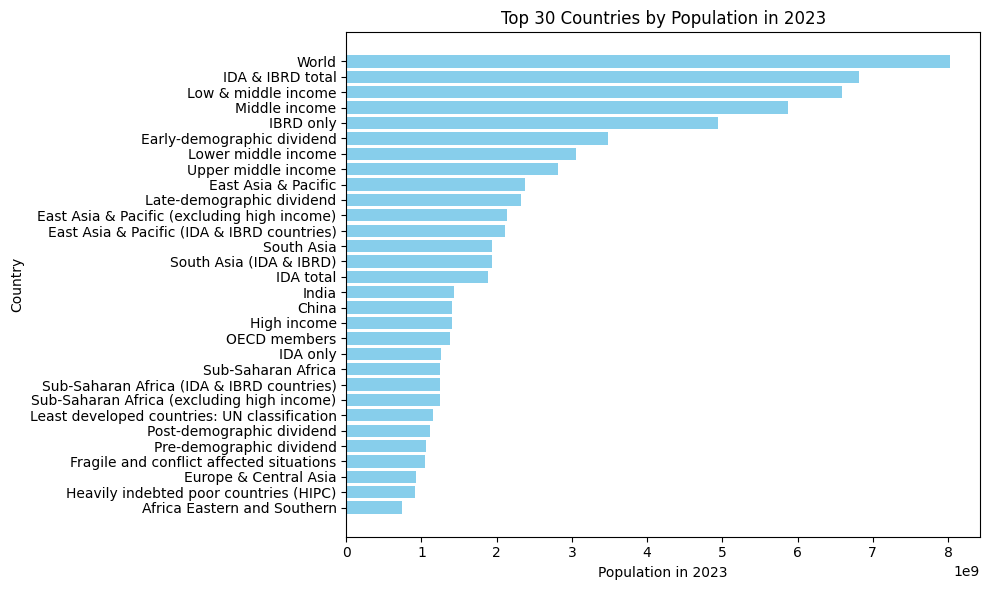

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
population_data_file = 'API_SP.POP.TOTL_DS2_en_csv_v2_31753.csv'
metadata_country_file = 'Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_31753.csv'
metadata_indicator_file = 'Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_31753.csv'

# Read CSV files
population_df = pd.read_csv(population_data_file, skiprows=4)
metadata_country_df = pd.read_csv(metadata_country_file)
metadata_indicator_df = pd.read_csv(metadata_indicator_file)

# Select the relevant year (2023) and drop missing population data
population_2023 = population_df[['Country Name', 'Country Code', '2023']].dropna()

# Merge population data with country metadata for region and income group
merged_df = pd.merge(population_2023, metadata_country_df[['Country Code', 'Region', 'IncomeGroup']],
                     how='left', on='Country Code')

# Sort by population and select the top 30 countries
population_2023_sorted = merged_df.sort_values(by='2023', ascending=False).head(30)

# Plot a horizontal bar chart for population distribution in 2023
plt.figure(figsize=(10, 6))
plt.barh(population_2023_sorted['Country Name'], population_2023_sorted['2023'], color='skyblue')
plt.xlabel('Population in 2023')
plt.ylabel('Country')
plt.title('Top 30 Countries by Population in 2023')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest population on top
plt.tight_layout()
plt.show()
